In [99]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# cc_fraud = pd.read_csv('../data/full_fraud_dataset.csv',nrows=100000)
cc_fraud = pd.read_csv('data/group2.csv',nrows=100000)
cc_fraud['full_name'] = cc_fraud['first'] + ' ' + cc_fraud['last']
print(cc_fraud.shape)

(100000, 26)


In [101]:
cc_fraud['trans_time'] =  pd.to_datetime(cc_fraud['trans_time'], format='%H:%M:%S').dt.strftime('%H:%M:%S')

In [102]:
to_drop = ['ssn', 'first', 'last', 'street', 'state', 'zip','unix_time']
cc_clean = cc_fraud.drop(to_drop, axis=1)

In [103]:
# pre-processing time
# transaction date
cc_clean['trans_datetime'] = pd.to_datetime(cc_clean['trans_date'])
cc_clean['trans_date'] = cc_clean['trans_datetime'].dt.date
cc_clean['trans_year'] = cc_clean['trans_datetime'].dt.year.astype(str)
cc_clean['trans_month'] = cc_clean['trans_datetime'].dt.month
cc_clean['trans_day'] = cc_clean['trans_datetime'].dt.day

# transaction time
cc_clean['trans_hour'] = cc_clean['trans_time'].str[:2].astype(int)

# convert month to string
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
cc_clean['trans_month_'] = cc_clean['trans_month'].map(month_map)

# convert time to part of day
def get_part_of_day(hour):
    """Return the part of day given the hour of day"""
    if (hour > 22) or (hour <= 6):
        return 'early morning'
    elif hour <= 11:
        return 'breakfast'
    elif hour <= 14:
        return 'lunch'
    elif hour <= 17:
        return 'afternoon'
    else:
        return 'dinner'
cc_clean.loc[:, 'part_of_day'] = cc_clean['trans_hour'].apply(get_part_of_day)

cc_clean['dob_datetime'] = pd.to_datetime(cc_clean['dob'])
cc_clean['dob'] = cc_clean['dob_datetime'].dt.date
cc_clean['age'] = (cc_clean['trans_date'] - cc_clean['dob'])/365
cc_clean['age'] = cc_clean['age'].apply(lambda x: x.days)

In [104]:
cc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   cc_num          100000 non-null  float64       
 1   gender          100000 non-null  object        
 2   city            100000 non-null  object        
 3   lat             100000 non-null  float64       
 4   long            100000 non-null  float64       
 5   city_pop        100000 non-null  int64         
 6   job             100000 non-null  object        
 7   dob             100000 non-null  object        
 8   acct_num        100000 non-null  float64       
 9   trans_num       100000 non-null  object        
 10  trans_date      100000 non-null  object        
 11  trans_time      100000 non-null  object        
 12  category        100000 non-null  object        
 13  amt             100000 non-null  float64       
 14  is_fraud        100000 non-null  int6

In [105]:
cc_clean

,cc_num,gender,city,lat,long,city_pop,job,dob,acct_num,trans_num,...,full_name,trans_datetime,trans_year,trans_month,trans_day,trans_hour,trans_month_,part_of_day,dob_datetime,age
0,3.576610e+15,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,3.828640e+11,8de7e404c5f91bac1d886a570fb8cc6b,...,Steve Williams,2021-10-21,2021,10,21,17,Oct,afternoon,1958-02-23,63
1,3.576610e+15,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,3.828640e+11,edc8b64ae9553673e79ffa6d3400ec6c,...,Steve Williams,2020-10-08,2020,10,8,23,Oct,early morning,1958-02-23,62
2,3.576610e+15,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,3.828640e+11,98fdd547527157e095d21c64d14d469e,...,Steve Williams,2020-12-15,2020,12,15,0,Dec,early morning,1958-02-23,62
3,3.576610e+15,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,3.828640e+11,bc2c5d0d3aeb3097d86c23a02e2bd09a,...,Steve Williams,2020-05-17,2020,5,17,11,May,breakfast,1958-02-23,62
4,3.576610e+15,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,3.828640e+11,8b940ee36589bc8c5db7a9e026d11883,...,Steve Williams,2021-08-22,2021,8,22,15,Aug,afternoon,1958-02-23,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.576490e+15,M,Ilagan,17.1333,121.8833,145568,Structural engineer,1934-08-04,2.867420e+11,82fbf0f62b2e4ea6759aca854bf12590,...,Scott Cole,2021-02-10,2021,2,10,4,Feb,early morning,1934-08-04,86
99996,3.576490e+15,M,Ilagan,17.1333,121.8833,145568,Structural engineer,1934-08-04,2.867420e+11,b496a1c9171927f15021e026e5e8d2b4,...,Scott Cole,2020-02-10,2020,2,10,16,Feb,afternoon,1934-08-04,85
99997,3.576490e+15,M,Ilagan,17.1333,121.8833,145568,Structural engineer,1934-08-04,2.867420e+11,24427ed54fe162574e99137bfad68531,...,Scott Cole,2021-02-04,2021,2,4,19,Feb,dinner,1934-08-04,86
99998,3.576490e+15,M,Ilagan,17.1333,121.8833,145568,Structural engineer,1934-08-04,2.867420e+11,492cee9fa06caa9976ebf6c35f75b2c0,...,Scott Cole,2021-03-27,2021,3,27,10,Mar,breakfast,1934-08-04,86


#### transactions 

In [106]:
## formatting full_datetime
transaction_dt = cc_clean[['full_name', 'acct_num', 'cc_num', 'trans_num', 'category', 'is_fraud', 'trans_date', 'trans_time']].sort_values(['full_name', 'trans_date', 'trans_time'])
transaction_dt['full_datetime'] = pd.to_datetime(pd.to_datetime(transaction_dt['trans_date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d') + transaction_dt['trans_time'], format='%Y-%m-%d%H:%M:%S')
transaction_dt.head()

,full_name,acct_num,cc_num,trans_num,category,is_fraud,trans_date,trans_time,full_datetime
50031,Aaron Chase,1.960530e+11,3.481480e+14,4f8a962f3dddc9f7e38511742f94f5c6,kids_pets,0,2020-01-01,22:20:55,2020-01-01 22:20:55
50792,Aaron Chase,1.960530e+11,3.481480e+14,d6f7186ff825d376de337b0736a8df51,misc_pos,0,2020-01-02,05:58:15,2020-01-02 05:58:15
50148,Aaron Chase,1.960530e+11,3.481480e+14,d369c21bde01d8936664b60ffe249966,shopping_pos,0,2020-01-02,06:20:53,2020-01-02 06:20:53
50332,Aaron Chase,1.960530e+11,3.481480e+14,449355d3afc7fbc8a0a9c4331b01baa0,personal_care,0,2020-01-02,19:30:42,2020-01-02 19:30:42
50709,Aaron Chase,1.960530e+11,3.481480e+14,99aa7b2fd8e3f8ed852fcd2736523ec4,kids_pets,0,2020-01-02,21:16:56,2020-01-02 21:16:56


In [107]:
# getting the first transaction per person
min_datetime = pd.DataFrame(transaction_dt.groupby(['full_name'])['full_datetime'].min()).reset_index()
min_datetime = min_datetime.rename(columns={'full_datetime':'min_datetime'})
min_datetime.shape

(90, 2)

In [108]:
## get time between transactions (regardless of fraud status)
transaction_dt = transaction_dt.merge(min_datetime, how = 'left', on = 'full_name')
transaction_dt['lagged_datetime'] = transaction_dt.groupby(['full_name'])['full_datetime'].shift(1)
transaction_dt['diff_datetime'] = (transaction_dt['full_datetime'] - transaction_dt['lagged_datetime'])
transaction_dt['diff_datetime_days'] = transaction_dt['diff_datetime'].astype('timedelta64[D]')
transaction_dt['diff_datetime_hrs'] = transaction_dt['diff_datetime'].astype('timedelta64[h]')
transaction_dt['diff_datetime_mins'] = transaction_dt['diff_datetime'].astype('timedelta64[m]')
transaction_dt

,full_name,acct_num,cc_num,trans_num,category,is_fraud,trans_date,trans_time,full_datetime,min_datetime,lagged_datetime,diff_datetime,diff_datetime_days,diff_datetime_hrs,diff_datetime_mins
0,Aaron Chase,1.960530e+11,3.481480e+14,4f8a962f3dddc9f7e38511742f94f5c6,kids_pets,0,2020-01-01,22:20:55,2020-01-01 22:20:55,2020-01-01 22:20:55,NaT,NaT,NaN,NaN,NaN
1,Aaron Chase,1.960530e+11,3.481480e+14,d6f7186ff825d376de337b0736a8df51,misc_pos,0,2020-01-02,05:58:15,2020-01-02 05:58:15,2020-01-01 22:20:55,2020-01-01 22:20:55,0 days 07:37:20,0.0,7.0,457.0
2,Aaron Chase,1.960530e+11,3.481480e+14,d369c21bde01d8936664b60ffe249966,shopping_pos,0,2020-01-02,06:20:53,2020-01-02 06:20:53,2020-01-01 22:20:55,2020-01-02 05:58:15,0 days 00:22:38,0.0,0.0,22.0
3,Aaron Chase,1.960530e+11,3.481480e+14,449355d3afc7fbc8a0a9c4331b01baa0,personal_care,0,2020-01-02,19:30:42,2020-01-02 19:30:42,2020-01-01 22:20:55,2020-01-02 06:20:53,0 days 13:09:49,0.0,13.0,789.0
4,Aaron Chase,1.960530e+11,3.481480e+14,99aa7b2fd8e3f8ed852fcd2736523ec4,kids_pets,0,2020-01-02,21:16:56,2020-01-02 21:16:56,2020-01-01 22:20:55,2020-01-02 19:30:42,0 days 01:46:14,0.0,1.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Tristan Kirby,1.334290e+11,3.815670e+13,291c80502ee368630aab3a304092abcd,kids_pets,0,2021-12-07,13:15:21,2021-12-07 13:15:21,2020-01-02 16:26:18,2021-12-06 09:12:55,1 days 04:02:26,1.0,28.0,1682.0
99996,Tristan Kirby,1.334290e+11,3.815670e+13,f553f9399f2d51862f4caaa0549cea4d,travel,0,2021-12-07,17:35:47,2021-12-07 17:35:47,2020-01-02 16:26:18,2021-12-07 13:15:21,0 days 04:20:26,0.0,4.0,260.0
99997,Tristan Kirby,1.334290e+11,3.815670e+13,1cddbde4ad69eef5eb3be9e892948662,kids_pets,0,2021-12-09,22:37:17,2021-12-09 22:37:17,2020-01-02 16:26:18,2021-12-07 17:35:47,2 days 05:01:30,2.0,53.0,3181.0
99998,Tristan Kirby,1.334290e+11,3.815670e+13,0743a0401e9a32ad0445d9be1542d0bf,kids_pets,0,2021-12-10,23:44:56,2021-12-10 23:44:56,2020-01-02 16:26:18,2021-12-09 22:37:17,1 days 01:07:39,1.0,25.0,1507.0


##### consecutive fraud

In [109]:
names = transaction_dt['full_name'].unique()
x = pd.DataFrame()

for nm in names:
    y = transaction_dt[transaction_dt['full_name'] == nm]
    y['seq'] = y['is_fraud'].ne(y['is_fraud'].shift()).cumsum()

    x = pd.concat([x, y])
    # print("sequence col generated for user: " + nm)

In [110]:
# identify sequence of fraud
summary_x = x.groupby(['full_name','is_fraud']).value_counts(['seq']).reset_index()
summary_x = summary_x.rename(columns = {0:'seq_cnt'})
summary_x[summary_x['is_fraud']==1]['seq'].unique()

array([2, 4, 1], dtype=int64)

In [111]:
summary_x.sort_values(['full_name', 'seq']).head(20)

,full_name,is_fraud,seq,seq_cnt
1,Aaron Chase,0,1,1046
2,Aaron Chase,1,2,9
0,Aaron Chase,0,3,1047
4,Aaron Suarez,0,1,213
6,Aaron Suarez,1,2,7
5,Aaron Suarez,0,3,51
7,Aaron Suarez,1,4,3
3,Aaron Suarez,0,5,1141
8,Aaron Walker,1,1,10
10,Alex Alexander,0,1,275


##### creating new features

In [112]:
## 
transaction_dt['prev_fraud'] = transaction_dt.groupby(['full_name'])['is_fraud'].shift(1).fillna(0)
transaction_dt['prev_category'] = transaction_dt.groupby(['full_name'])['category'].shift(1)

In [113]:
# convert time to part of day
def get_hr_between_trans(hour):
    """Return the part of day given the hour of day"""
    if (hour > 24):
        return '> 24hrs'
    elif (hour <= 24) & (hour > 12):
        return '> 12hrs'
    elif (hour <= 12) & (hour > 6):
        return '> 6hrs'
    elif (hour <= 6) & (hour > 3):
        return '> 3hrs'
    elif (hour <= 3) & (hour > 1):
        return '> 1hr'
    else:
        return '<= 1hr'

transaction_dt['hrs_cat'] = transaction_dt['diff_datetime_hrs'].apply(get_hr_between_trans).astype('category')

In [114]:
transaction_dt['hrs_cat'].value_counts()

<= 1hr     20393
> 6hrs     19121
> 12hrs    16992
> 3hrs     16012
> 1hr      14798
> 24hrs    12684
Name: hrs_cat, dtype: int64

In [115]:
transaction_dt = transaction_dt.merge(cc_clean[['full_name', 'trans_num', 'merchant', 'amt', 'city', 'lat', 'long', 'merch_lat', 'merch_long']], on =['full_name','trans_num'], how = 'left')

In [116]:
transaction_dt.columns

Index(['full_name', 'acct_num', 'cc_num', 'trans_num', 'category', 'is_fraud',
       'trans_date', 'trans_time', 'full_datetime', 'min_datetime',
       'lagged_datetime', 'diff_datetime', 'diff_datetime_days',
       'diff_datetime_hrs', 'diff_datetime_mins', 'prev_fraud',
       'prev_category', 'hrs_cat', 'merchant', 'amt', 'city', 'lat', 'long',
       'merch_lat', 'merch_long'],
      dtype='object')

#### encode categorical variables

In [117]:
from sklearn.preprocessing import OrdinalEncoder

In [118]:
enc = OrdinalEncoder()
transaction_dt[['hrs_cat', 'is_fraud', 'prev_category', 'prev_fraud', 'category', 'merchant']] = enc.fit_transform(transaction_dt[['hrs_cat', 'is_fraud', 'prev_category', 'prev_fraud', 'category', 'merchant']])



In [119]:
transaction_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   full_name           100000 non-null  object         
 1   acct_num            100000 non-null  float64        
 2   cc_num              100000 non-null  float64        
 3   trans_num           100000 non-null  object         
 4   category            100000 non-null  float64        
 5   is_fraud            100000 non-null  float64        
 6   trans_date          100000 non-null  object         
 7   trans_time          100000 non-null  object         
 8   full_datetime       100000 non-null  datetime64[ns] 
 9   min_datetime        100000 non-null  datetime64[ns] 
 10  lagged_datetime     99910 non-null   datetime64[ns] 
 11  diff_datetime       99910 non-null   timedelta64[ns]
 12  diff_datetime_days  99910 non-null   float64        
 13  diff_datetime_h

In [120]:
!pip install geopy


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
from geopy import distance

In [122]:
transaction_dt['dist_to_merch_in_kms'] = transaction_dt.apply(lambda r: distance.distance((r['lat'], r['long']), (r['merch_lat'], r['merch_long'])).km, axis=1)

In [123]:
transaction_dt.head()

,full_name,acct_num,cc_num,trans_num,category,is_fraud,trans_date,trans_time,full_datetime,min_datetime,...,prev_category,hrs_cat,merchant,amt,city,lat,long,merch_lat,merch_long,dist_to_merch_in_kms
0,Aaron Chase,1.960530e+11,3.481480e+14,4f8a962f3dddc9f7e38511742f94f5c6,7.0,0.0,2020-01-01,22:20:55,2020-01-01 22:20:55,2020-01-01 22:20:55,...,NaN,0.0,111.0,115.58,San Jose del Monte,14.8139,121.0453,14.506379,120.512505,66.720087
1,Aaron Chase,1.960530e+11,3.481480e+14,d6f7186ff825d376de337b0736a8df51,9.0,0.0,2020-01-02,05:58:15,2020-01-02 05:58:15,2020-01-01 22:20:55,...,7.0,5.0,16.0,4.35,San Jose del Monte,14.8139,121.0453,15.614414,121.179912,89.750504
2,Aaron Chase,1.960530e+11,3.481480e+14,d369c21bde01d8936664b60ffe249966,12.0,0.0,2020-01-02,06:20:53,2020-01-02 06:20:53,2020-01-01 22:20:55,...,9.0,0.0,144.0,4.65,San Jose del Monte,14.8139,121.0453,14.634738,120.816475,31.625560
3,Aaron Chase,1.960530e+11,3.481480e+14,449355d3afc7fbc8a0a9c4331b01baa0,10.0,0.0,2020-01-02,19:30:42,2020-01-02 19:30:42,2020-01-01 22:20:55,...,12.0,1.0,160.0,32.87,San Jose del Monte,14.8139,121.0453,15.591447,120.376038,112.130879
4,Aaron Chase,1.960530e+11,3.481480e+14,99aa7b2fd8e3f8ed852fcd2736523ec4,7.0,0.0,2020-01-02,21:16:56,2020-01-02 21:16:56,2020-01-01 22:20:55,...,10.0,0.0,177.0,192.43,San Jose del Monte,14.8139,121.0453,15.723204,121.197265,101.931179


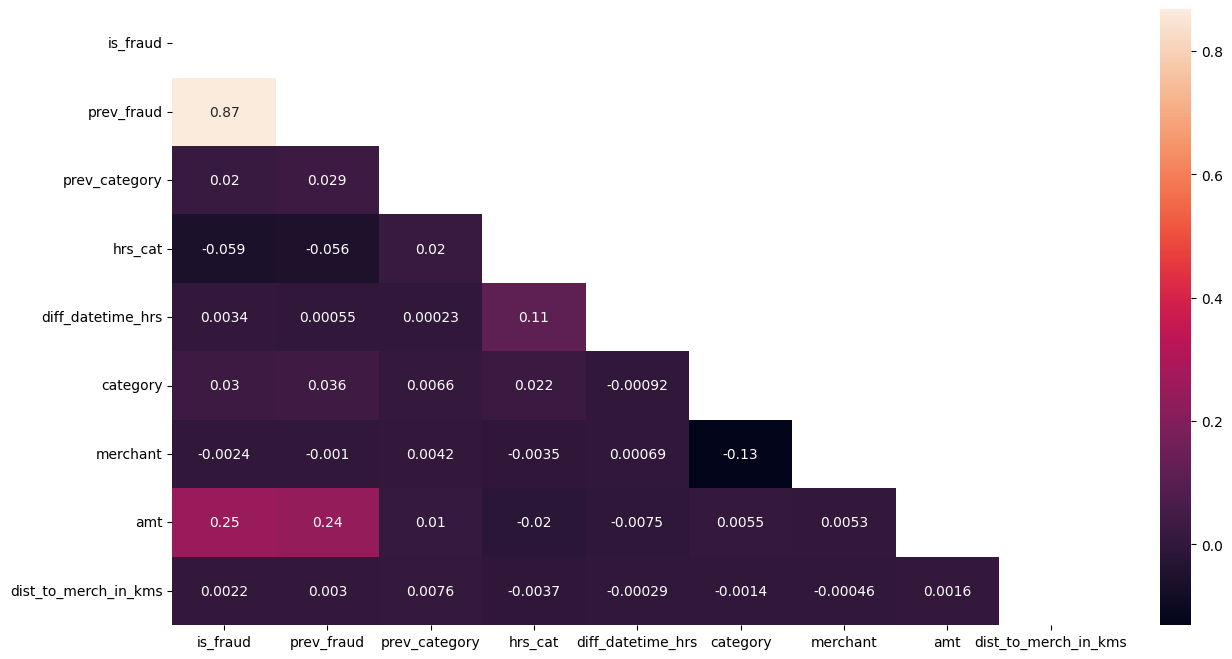

In [124]:
quant = transaction_dt[['is_fraud', 'prev_fraud', 'prev_category', 'hrs_cat', 'diff_datetime_hrs', 'category', 'merchant', 'amt', 'dist_to_merch_in_kms']]

corr = quant.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)


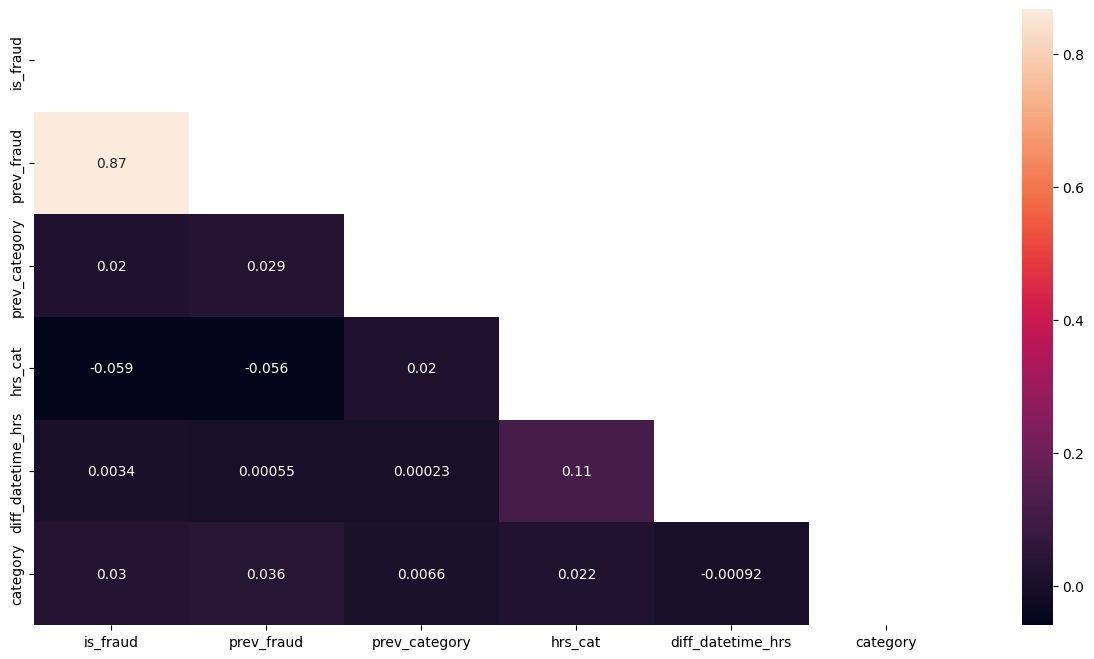

In [125]:
quant = transaction_dt[['is_fraud', 'prev_fraud', 'prev_category', 'hrs_cat', 'diff_datetime_hrs', 'category']]

corr = quant.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)


##### timeline plot

In [126]:
# plt.figure(figsize=(15, 6))

# import altair as alt
# import datetime as dt
# import pandas as pd

# source = timeline_data

# alt.Chart(source).mark_point(size =100).encode(
#     x=alt.X('start', title = "Time",
#     axis=alt.Axis(labelFontSize=14, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('italic'), alt.value('bold')))),
#     y=alt.Y('artist_name', title = 'Artists',
#     axis=alt.Axis(labelFontSize=14, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('italic'), alt.value('bold')))),
#     # color=alt.Color('artist_name', scale=alt.Scale(scheme='dark2'), legend = None)
#     color=alt.condition("datum.top_flag == 'yes'", alt.value('red'), alt.Color('in the chart'))
#     #, labelFontStyle=alt.condition('datum.value == "Jeremy Corbyn"', alt.value('bold'), alt.value('italic')))
# ).properties(
#     width = 600,
#     height = 400,
#     title = 'Album Release Timeline'
# )